# Mobile Price Classification
classify mobile price range

**Best results f1_score : 0.834 % accuracy : 0.9551051666666667**

## Overview 
### 1) Context

### 2) Describtion 

### 3) Used Python Libraries

### 4) Exploratory Data Analysis (EDA) 

### 5) Data Normalization

### 6) Feature Selection with Visualization

### 7) Feature Selection with Hypothesis test 

### 8) Model Buliding 

### 9) Receiver Operating Characteristic Score (ROC AUC) 

### 10) Conclusion 

### 11) Applying Algorithm 






## Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is


![](https://s3b.cashify.in/gpro/uploads/2019/07/09100223/mobile-phone-evolution.jpg)


## Describtion

1. Id : id
2. battery_power: Total energy a battery can store in one time measured in mAh
3. blue     : Has bluetooth or not 
4. clock_speed : speed at which microprocessor executes instructions 
5. dual_sim : Has dual sim support or not 
6. fc : Front Camera mega pixels 
7. four_g  : Has 4G or not 
8. int_memory : Internal Memory in Gigabytes 
9. m_dep :   Mobile Depth in cm 
10. mobile_wt : Weight of mobile phone 
11. n_cores :  Number of cores of processor 
12. pc : Primary Camera mega pixels 
13. px_height : Pixel Resolution Height 
14. px_width : Pixel Resolution Width 
15. ram : Random Access Memory in Megabytes 
16. sc_h : Screen Height of mobile in cm 
17. sc_w : Screen Width of mobile in cm 
18. talk_time  : longest time that a single battery charge will last when you are 
19. three_g : Has 3G or not 
20. touch_screen : Has touch screen or not 
21. wifi  : Has wifi or not 
22. price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost). 


## Used Python Libraries

In [4]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Know Dataset Nature
1. head() : It is used to get the **first 5 rows** of the dataframe.
2. tail() : It is used to get the **last 5 rows** of the dataframe.
3. describe() : It is used to view some **basic statistical details** like percentile, mean, std etc.
4. info() : It is used to print a **concise summary** of a DataFrame. including the **index dtype and column dtypes, non-null values and memory usage.**

In [5]:

#/kaggle/input/mobile-price-classification/train.csv
#/kaggle/input/mobile-price-classification/test.csv

traindata = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
testdata = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [6]:
traindata.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [7]:
traindata.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

In [8]:
traindata.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [9]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Light Data Exploration
### 1) For numeric data 
* Made histograms to understand distributions 
* Corrplot 
* Pivot table comparing survival rate across numeric variables 


### 2) For Categorical Data 
* Made bar charts to understand balance of classes 
* Made pivot tables to understand relationship with survival 

In [10]:
data_num = traindata[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

data_cat = traindata[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

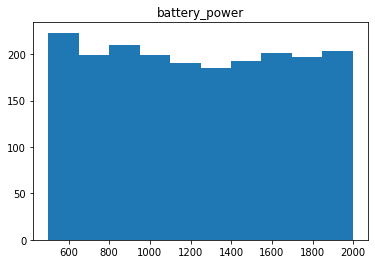

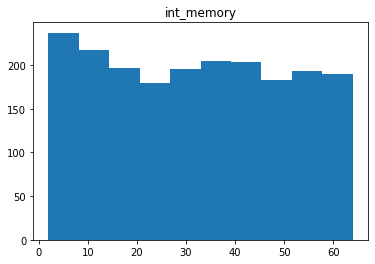

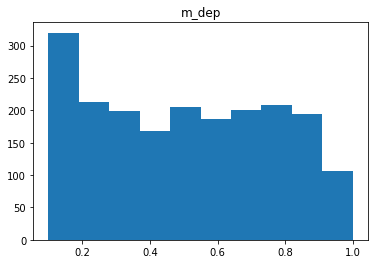

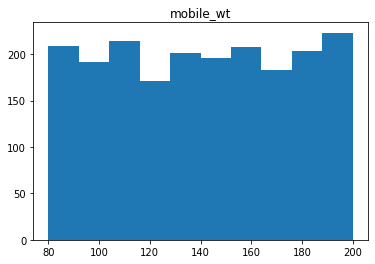

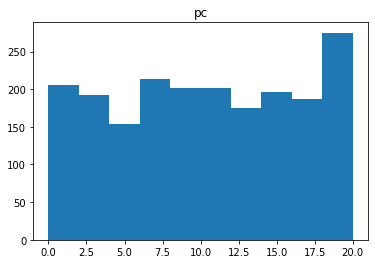

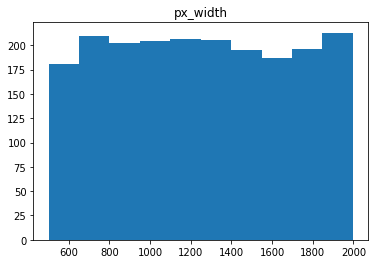

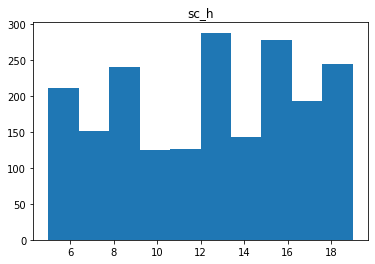

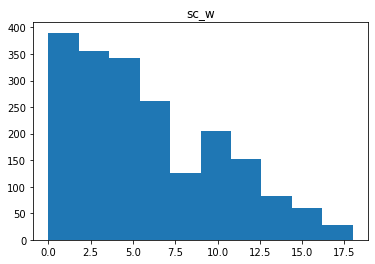

In [11]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

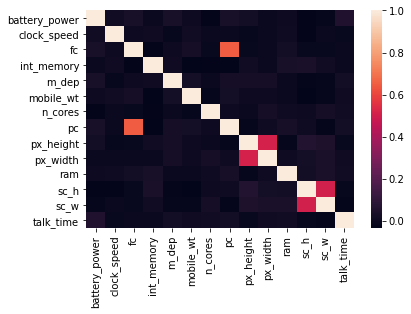

In [12]:
sns.heatmap(data_num.corr())

In [13]:
pd.pivot_table(traindata, index='price_range', values=['battery_power',  'clock_speed' , 'fc','int_memory', 'mobile_wt', 
                                                       'pc', 'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time'])

battery_power  clock_speed     fc  int_memory  mobile_wt      pc  \
price_range                                                                     
0                 1116.902       1.5502  4.084      31.174    140.552   9.574   
1                 1228.868       1.4886  4.340      32.116    140.510   9.924   
2                 1228.320       1.5298  4.498      30.920    143.614  10.018   
3                 1379.984       1.5204  4.316      33.976    136.320  10.150   

             px_height  px_width       ram    sc_h   sc_w  talk_time  
price_range                                                           
0              536.408  1150.270   785.314  12.324  5.682     10.612  
1              666.892  1251.908  1679.490  12.212  5.544     11.362  
2              632.284  1234.046  2582.816  12.010  5.714     10.972  
3              744.848  1369.838  3449.232  12.680  6.128     11.098

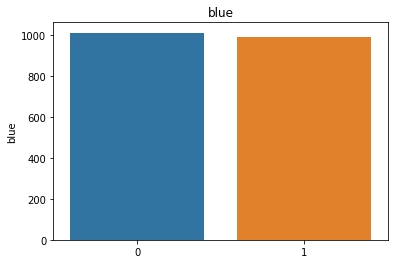

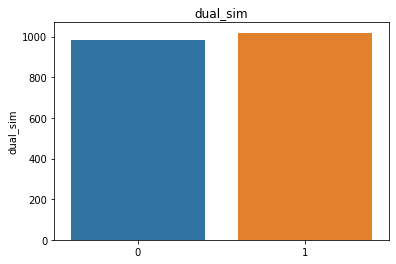

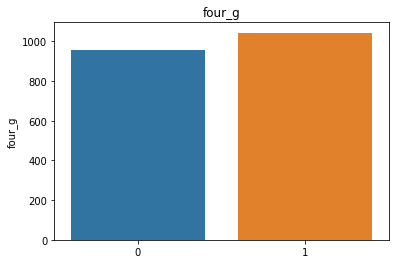

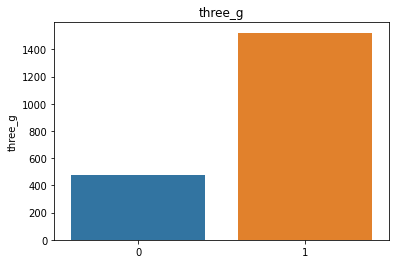

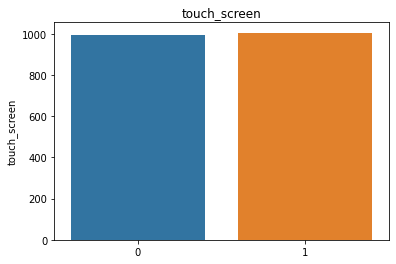

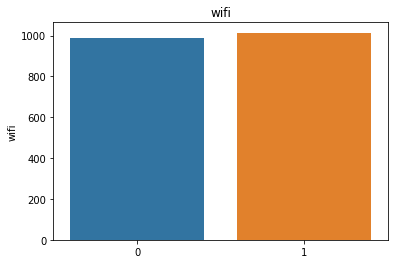

In [14]:
for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.show()

In [15]:
# fc, px_height, three_g

In [16]:
for i in data_cat:
    print(pd.pivot_table(traindata,index='price_range',columns=i, values='ram'))
    print("=="*20)

blue                   0            1
price_range                          
0             779.603113   791.353909
1            1646.984314  1713.322449
2            2592.439689  2572.637860
3            3445.161826  3453.019305
dual_sim               0            1
price_range                          
0             767.612000   803.016000
1            1661.848980  1696.439216
2            2545.438247  2620.493976
3            3410.038298  3483.988679
four_g                 0            1
price_range                          
0             801.315353   770.424710
1            1661.605042  1695.736641
2            2607.498024  2557.534413
3            3451.875556  3447.069091
three_g                0            1
price_range                          
0             821.220472   773.088472
1            1653.295082  1687.944444
2            2631.716814  2568.537468
3            3437.121739  3452.849351
touch_screen            0            1
price_range                           
0         

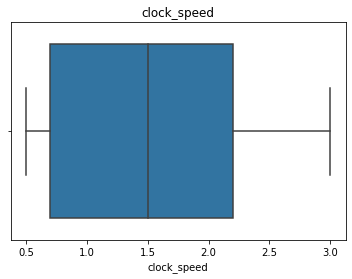

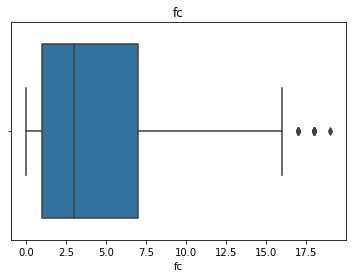

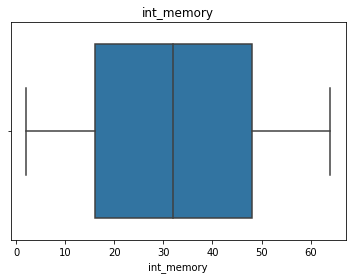

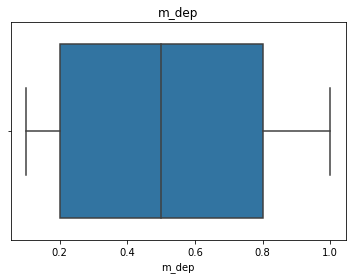

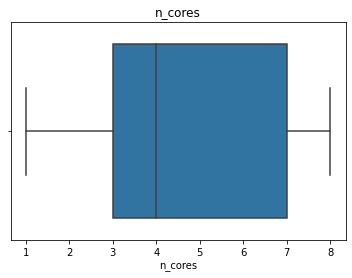

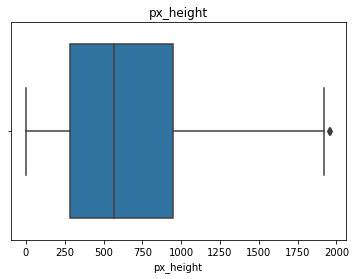

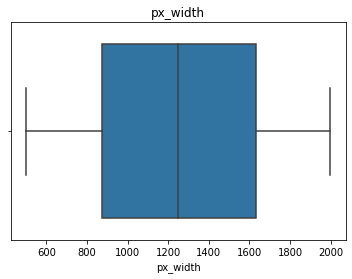

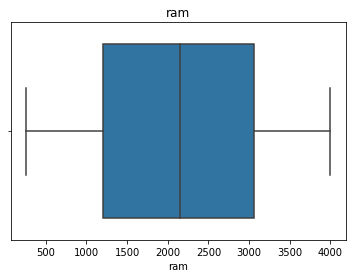

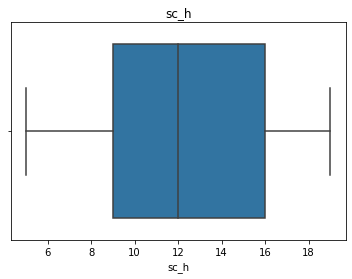

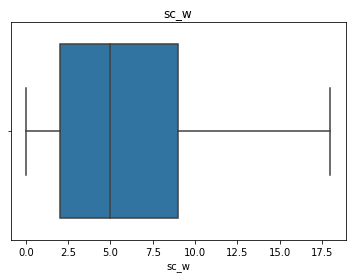

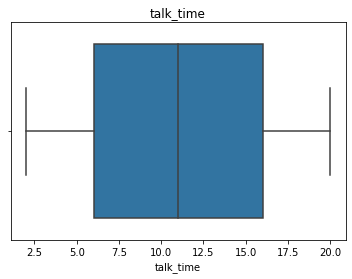

In [17]:
# dealing with outliers values
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

## Data Normalization

1. interquartile range: It is hlep us to find **outlier values** in th columns.
2. outlinefree() : It is a customise function that help us to figureout and work on outlier values in columns. meanly, it is used to **remove outlires** values from dataset.    
3. for-loop: with the help of for-loop, we are checking the **outlinefree()** function worked properly or not.

In [18]:
def outlinefree(dataCol):     
      
    sorted(dataCol)                          # sort column
    Q1,Q3 = np.percentile(dataCol,[25,75])   # getting 25% and 75% percentile
    IQR = Q3-Q1                              # getting IQR 
    LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
    UpperRange = Q3+(1.5 * IQR)              # getting Upperrange 
    
    colname = dataCol.tolist()               # convert column into list  
    newlist =[]                              # empty list for store new values
    for i in range(len(colname)):
        
        if colname[i] > UpperRange:          # list number > Upperrange 
            colname[i] = UpperRange          # then number = Upperrange
            newlist.append(colname[i])       # append value to empty list
        elif colname[i] < LowerRange:        # list number < Lowrange 
            colname[i] = LowerRange          # then number = Lowrange
            newlist.append(colname[i])       # append value to empty list 
        else:
            colname[i]                       # list number
            newlist.append(colname[i])       # append value to empty list
            
        

    return newlist

In [19]:
for i in range(len(data_num.columns)):
    new_list =  outlinefree(traindata.loc[:,data_num.columns[i]]) # retrun new list
    traindata.loc[:,data_num.columns[i]] = new_list               # new list = data.columns

In [20]:
data_final_num = traindata[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

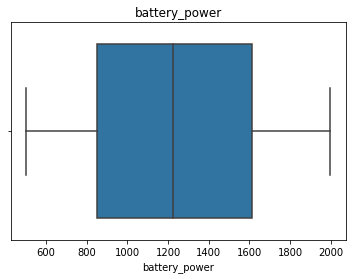

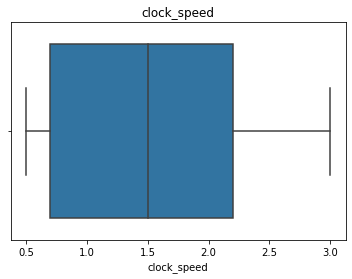

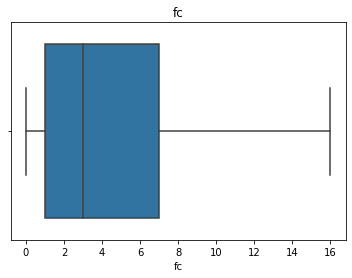

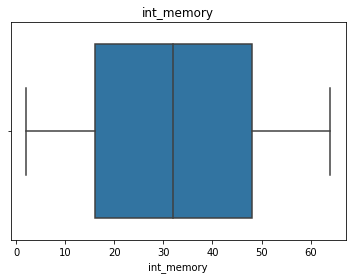

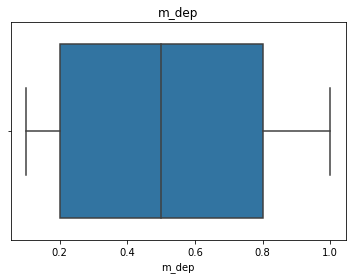

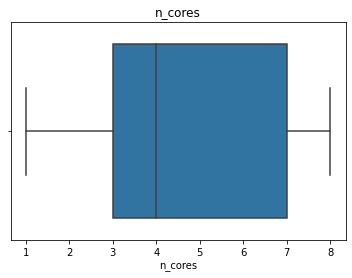

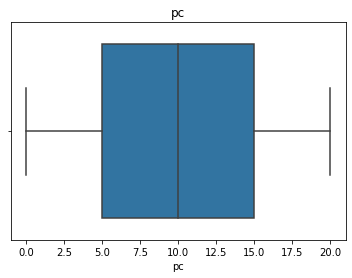

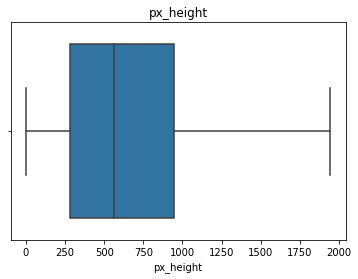

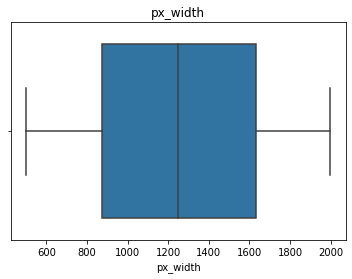

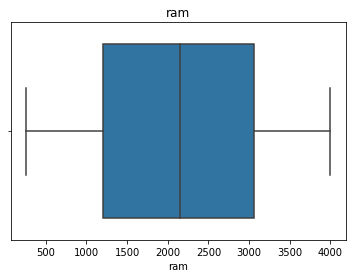

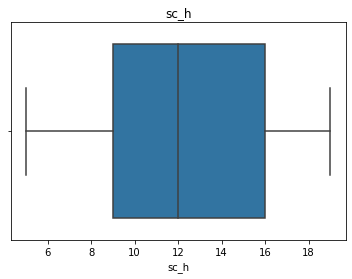

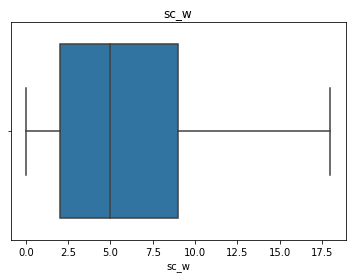

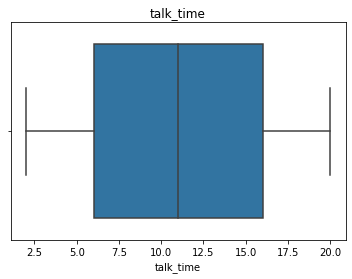

In [21]:

for i in data_final_num.columns:
    sns.boxplot(data_final_num[i])
    plt.title(i)
    plt.show()

## Feature Selection

1. seaborn.pairplot(): It is help to figure-out relation between features and label.

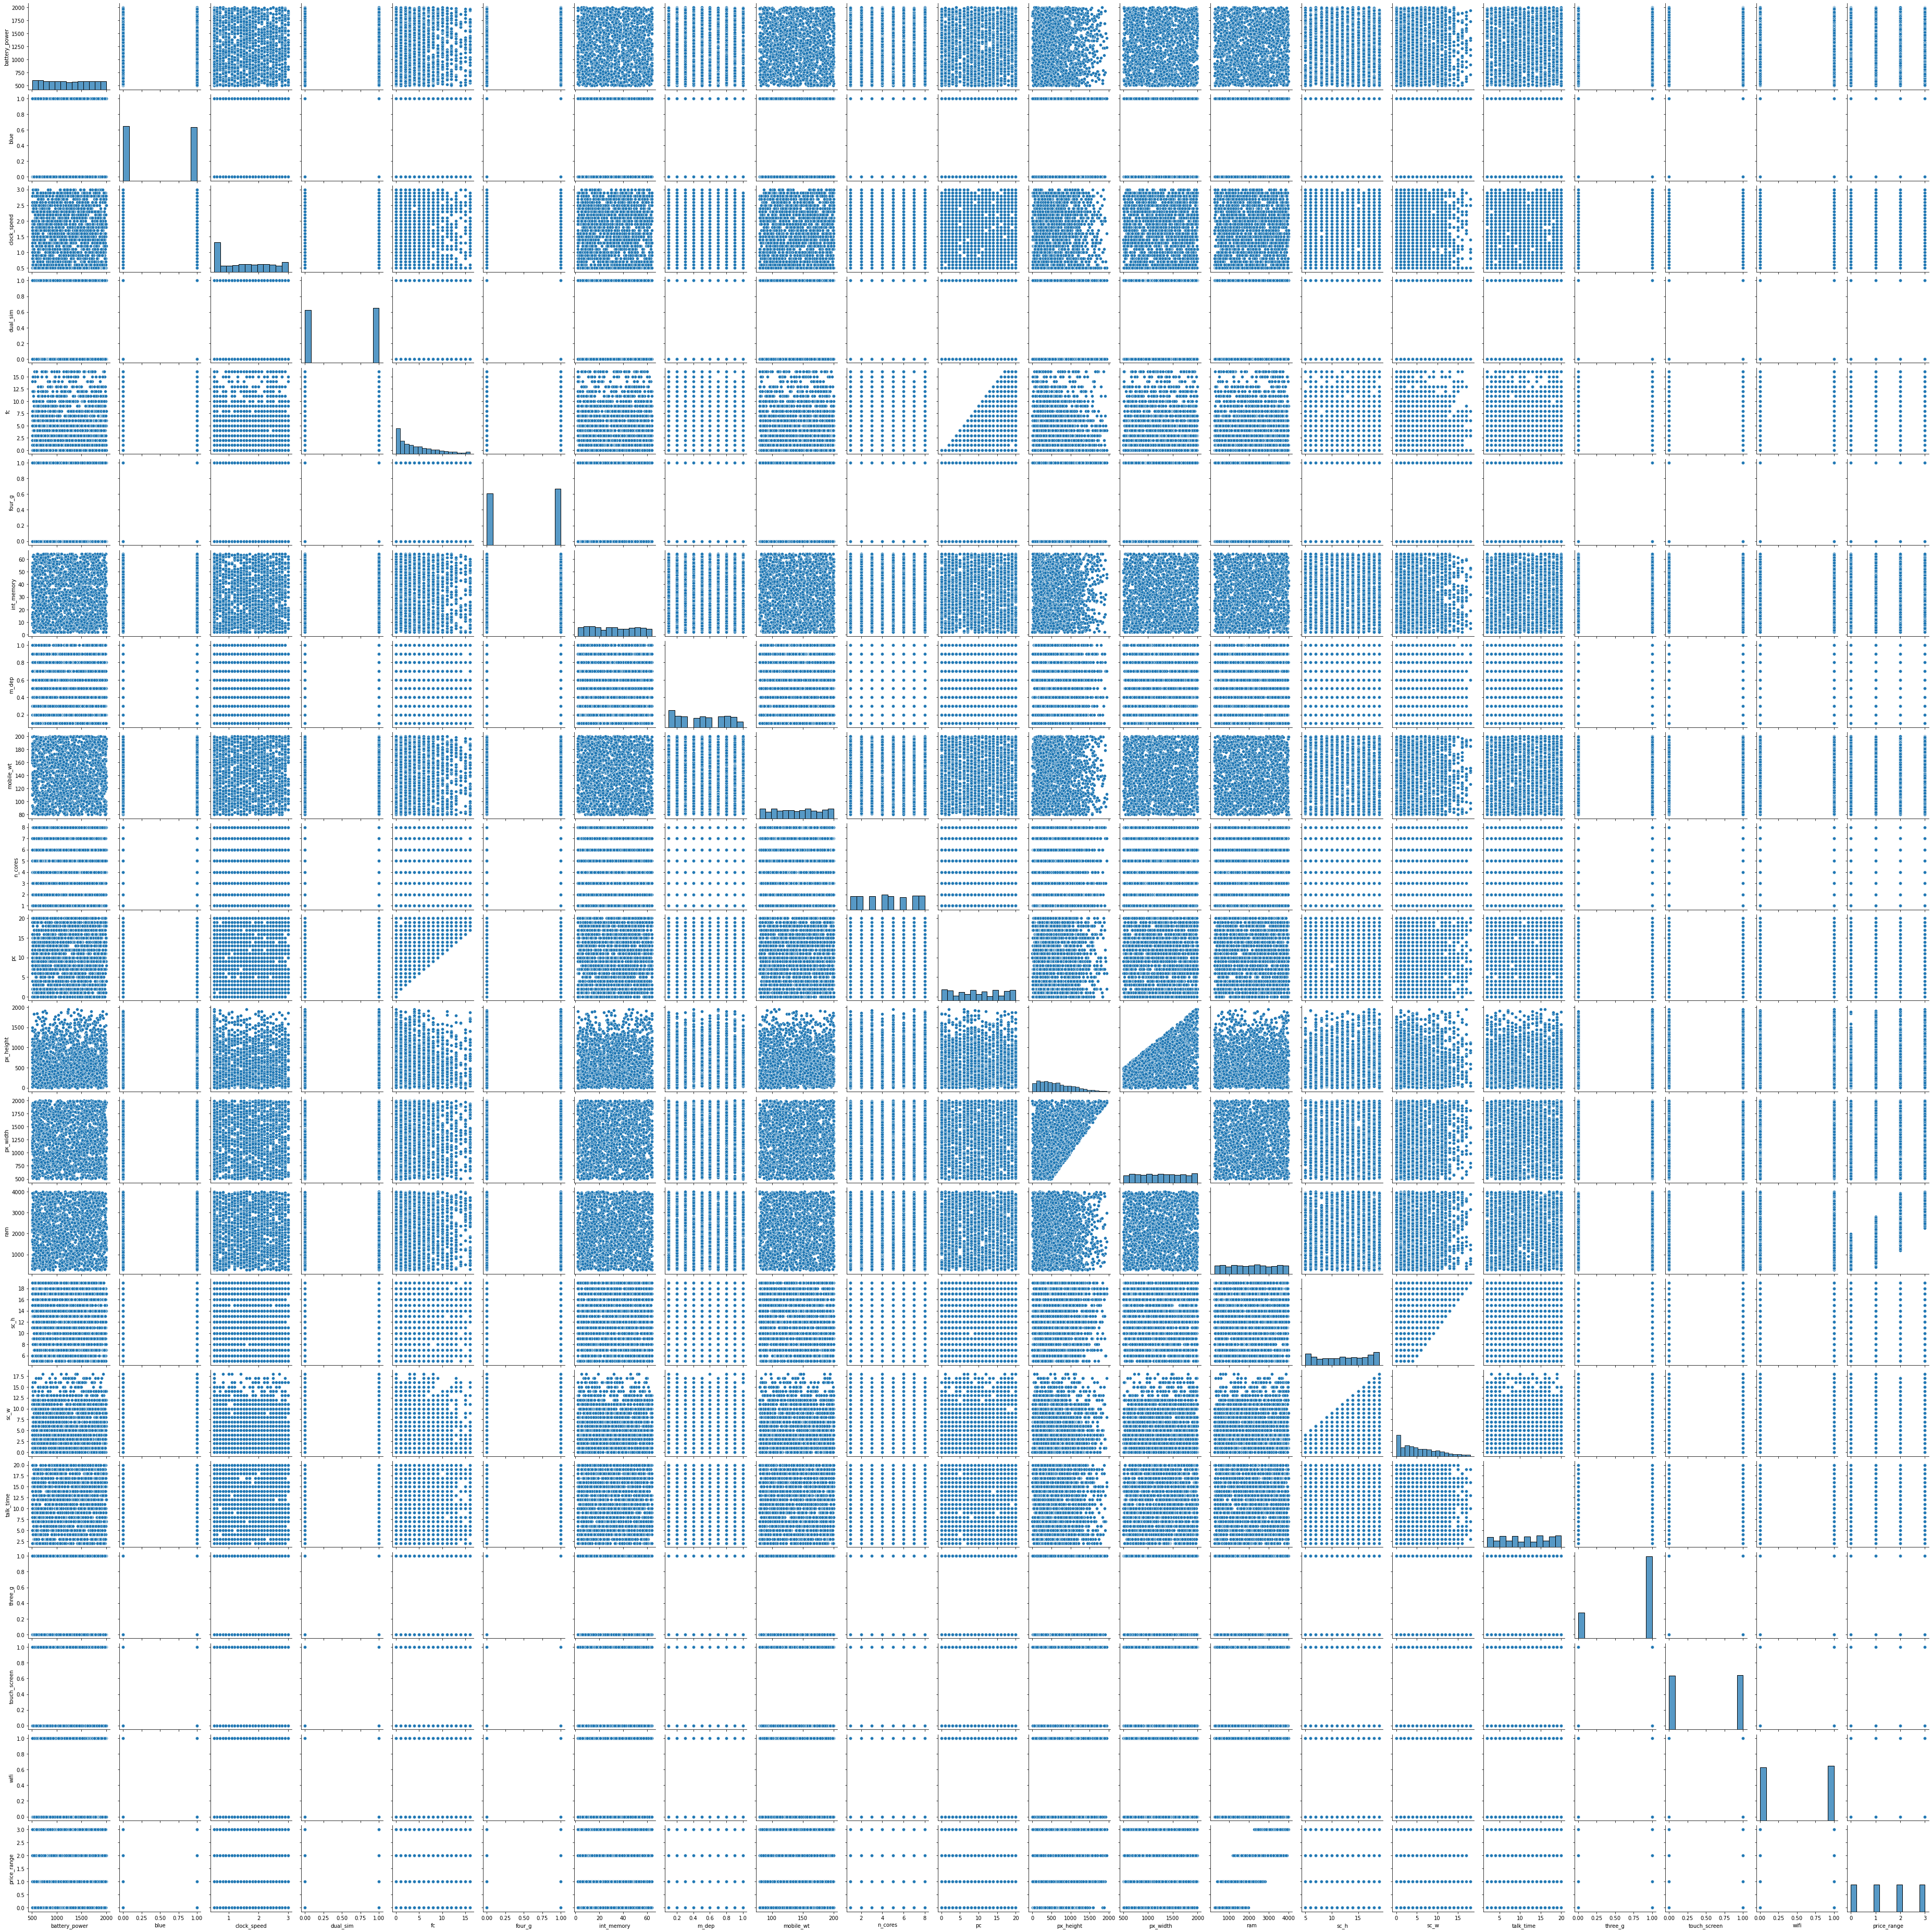

In [22]:
sns.pairplot(traindata)

## Feature Selection with hypothesis test
1. Chi-test: It is help to figure-out relation between features and label with **"pvalue <= 0.1"**

In [23]:
ct = pd.crosstab(traindata['wifi'],traindata['price_range'])
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)
print("pvalue : ",pvalue)

if pvalue <= 0.1:
    print("Alternate Hypothesis passed. int_memory and price_range have Relationship")
else:
    print("Null hypothesis passed. int_memory and price_range doesnot have  Relationship")

pvalue :  0.8359905195342198
Null hypothesis passed. int_memory and price_range doesnot have  Relationship


In [24]:
features = traindata.loc[:,["battery_power","int_memory", "ram","sc_w"]].values
label = traindata.iloc[:,-1].values

## Model Buliding
here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

1. Logistic Regression (f1 score: 0.782 )
2. naive bayes (f1 score: 0.278)
3. support vector classification (f1 score: 0.266 )
4. **DecisionTreeClassifier (f1 score: 0.834)**
5. RandomForestClassifier (f1 score: 0.262)

In [25]:
#------------------------LogisticRegression-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=167)

classimodel= LogisticRegression(solver="liblinear")  
classimodel.fit(X_train, y_train)
trainscore =  classimodel.score(X_train,y_train)
testscore =  classimodel.score(X_test,y_test)  

print("test score: {}".format(testscore),'\n')
y_predlogi =  classimodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predlogi,average='micro'),'\n')
print(confusion_matrix(y_test, y_predlogi))


test score: 0.784 

 f1 score:  0.7840000000000001 

[[124   8   0   0]
 [ 10  75  24   0]
 [  0  23  55  41]
 [  0   0   2 138]]


In [26]:
print(' precision score: ',precision_score(y_test, y_predlogi,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predlogi,average='micro'),'\n')
print(classification_report(y_test, y_predlogi))

 precision score:  0.784 

 recall score:  0.784 

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       132
           1       0.71      0.69      0.70       109
           2       0.68      0.46      0.55       119
           3       0.77      0.99      0.87       140

    accuracy                           0.78       500
   macro avg       0.77      0.77      0.76       500
weighted avg       0.78      0.78      0.77       500



In [29]:
#------------------------------naive bayes---------------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=120) 

NBmodel = GaussianNB()  
NBmodel.fit(X_train, y_train) 

trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')
y_predNB =  NBmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predNB,average='micro'),'\n')
print(confusion_matrix(y_test, y_predNB))

test score: 0.818 train score: 0.7646666666666667 

 f1 score:  0.818 

[[113  11   0   0]
 [ 16  82  18   0]
 [  0  16  90  18]
 [  0   0  12 124]]


In [28]:
print(' precision score: ',precision_score(y_test, y_predNB,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predNB,average='micro'),'\n')
print(classification_report(y_test, y_predNB))

 precision score:  0.818 

 recall score:  0.818 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       124
           1       0.75      0.71      0.73       116
           2       0.75      0.73      0.74       124
           3       0.87      0.91      0.89       136

    accuracy                           0.82       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.82      0.82      0.82       500



In [30]:
#-------------------------------- support vector classification -------------------------------------  
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=39) 

svcmodel = SVC(probability=True)  
svcmodel.fit(X_train, y_train) 

trainscore =  svcmodel.score(X_train,y_train)
testscore =  svcmodel.score(X_test,y_test)  

print("test score: {} ".format(testscore),'\n')

y_predsvc =  svcmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predsvc,average='micro'),'\n')
print(confusion_matrix(y_test, y_predsvc))

test score: 0.864  

 f1 score:  0.864 

[[133   6   0   0]
 [ 12  94   9   0]
 [  0  13  97  11]
 [  0   0  17 108]]


In [31]:
print(' precision score: ',precision_score(y_test, y_predsvc,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predsvc,average='micro'),'\n')
print(classification_report(y_test, y_predsvc))

 precision score:  0.864 

 recall score:  0.864 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       139
           1       0.83      0.82      0.82       115
           2       0.79      0.80      0.80       121
           3       0.91      0.86      0.89       125

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [32]:
#------------------------Decision Tree-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=194)

DTmodel=  DecisionTreeClassifier(max_depth=4)  
DTmodel.fit(X_train, y_train)
trainscore =  DTmodel.score(X_train,y_train)
testscore =  DTmodel.score(X_test,y_test)
y_predDT =  DTmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predDT,average='micro'),'\n')
print(confusion_matrix(y_test, y_predDT))

test score: 0.834  

 f1 score:  0.834 

[[121  11   0   0]
 [ 12 102  21   0]
 [  0  12  91  10]
 [  0   0  17 103]]


In [33]:
print(' precision score: ',precision_score(y_test, y_predDT,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predDT,average='micro'),'\n')
print(classification_report(y_test, y_predDT))

 precision score:  0.834 

 recall score:  0.834 

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       132
           1       0.82      0.76      0.78       135
           2       0.71      0.81      0.75       113
           3       0.91      0.86      0.88       120

    accuracy                           0.83       500
   macro avg       0.84      0.83      0.83       500
weighted avg       0.84      0.83      0.84       500



In [34]:
#------------------------Random Forest-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=39)

RFmodel=  RandomForestClassifier(criterion='entropy',max_depth=4) 
RFmodel.fit(X_train, y_train)
trainscore =  RFmodel.score(X_train,y_train)
testscore =  RFmodel.score(X_test,y_test)  
y_predRF =  RFmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predRF,average='micro'),'\n')
print(confusion_matrix(y_test, y_predRF))

 f1 score:  0.834 

[[132   7   0   0]
 [ 14  93   8   0]
 [  0  18  90  13]
 [  0   0  23 102]]


In [36]:
print(' precision score: ',precision_score(y_test, y_predRF,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predRF,average='micro'),'\n')
print(classification_report(y_test, y_predRF))

 precision score:  0.834 

 recall score:  0.834 

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       139
           1       0.79      0.81      0.80       115
           2       0.74      0.74      0.74       121
           3       0.89      0.82      0.85       125

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



## Receiver Operating Characteristic Score (ROC AUC)
here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

1. Logistic Regression (auc: 0.9362343333333334)
2. naive bayes (auc: 0.9429046666666667)
3. support vector classification (auc: 0.9649543333333334)
4. DecisionTreeClassifier (auc: 0.9551051666666667)
5. **RandomForestClassifier (auc: 0.9655039999999999)**

In [37]:
#-------------------------------------- LogisticRegression -------------------------------------
probabilityValues = classimodel.predict_proba(features)
auc = roc_auc_score(label,probabilityValues,multi_class ='ovr')
print(auc)

0.9375753333333334


In [38]:
#-------------------------------------- naive bayes -------------------------------------
probabilityValues = NBmodel.predict_proba(features)
auc = roc_auc_score(label,probabilityValues,multi_class ='ovr')
print(auc)

0.9429046666666667


In [39]:
#-------------------------------------- support vector classification -------------------------------------
probabilityValues = svcmodel.predict_proba(features)
auc = roc_auc_score(label,probabilityValues,multi_class ='ovr')
print(auc)

0.9649236666666666


In [40]:
#-------------------------------------- Decision Tree -------------------------------------
probabilityValues = DTmodel.predict_proba(features)
auc = roc_auc_score(label,probabilityValues,multi_class ='ovr')
print(auc)

0.9551051666666667


In [41]:
#-------------------------------------- Random Forest -------------------------------------
probabilityValues = RFmodel.predict_proba(features)
auc = roc_auc_score(label,probabilityValues,multi_class ='ovr')
print(auc)

0.9659276666666667


## Conclusion
I will choose a **Decision Tree** algorithm for this test-dataset.

Decision Tree 
1. **f1_score: 0.834**
2. **auc: 0.9551051666666667**

## Applying Algorithm
1. we have to separet relational columns from the test dataset that will be columns assign to a new dataset.
2.  now we are ready for applying the decision tree algorithm on the test dataset.
3. now we have model-predicted prices and we can assign a price column to the test dataset.

In [42]:
finaltestdata = testdata.loc[:,["battery_power","int_memory", "ram","sc_w"]]

In [43]:
 predicted_price = DTmodel.predict(finaltestdata)

In [44]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 0, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 0, 3,
       2, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 2, 2, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 3, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 2, 1, 0, 3, 3, 2, 1, 0, 2,
       2, 1, 2, 0, 2, 0, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 3, 2, 1, 2, 2,
       2, 3, 1, 2, 3, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 3, 2, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 3, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 2, 3, 0, 0, 3, 2, 3, 1, 3, 2, 0, 3, 2, 1, 2,
       3, 3, 3, 2, 0, 1, 2, 2, 1, 1, 3, 2, 0, 2, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 2, 2, 3, 2, 2, 1, 2, 0, 3, 3, 2,

In [45]:
testdata['price_range']=predicted_price

In [46]:
testdata.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0    0.1        193  ...        226      1412  3476    12     7          2   
1    0.8        191  ...        746       857  3895     6     0          7   
2    0.9        186  ...       1270      1366  2396    17    10         10   
3    0.5         96  ...        295      1752  3893    10     0          7   
4    0.5        108  ...        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  price_range  
0        0             1     0            3  
1        1             0     0            3  
2        0             1     1            2  
3        1             1     0            3  
4        1             0     1            1  

[5 rows x 22 columns]